# Micro Credit Defaulter Project

## Introduction

A Microfinance Institution (MFI) is an organization that offers financial services to low income populations. MFS becomes very useful when targeting especially the unbanked poor families living in remote areas with not much sources of income. The Microfinance services (MFS) provided by MFI are Group Loans, Agricultural Loans, Individual Business Loans and so on. 
Many microfinance institutions (MFI), experts and donors are supporting the idea of using mobile financial services (MFS) which they feel are more convenient and efficient, and cost saving, than the traditional high-touch model used since long for the purpose of delivering microfinance services. Though, the MFI industry is primarily focusing on low income families and are very useful in such areas, the implementation of MFS has been uneven with both significant challenges and successes.
Today, microfinance is widely accepted as a poverty-reduction tool, representing $70 billion in outstanding loans and a global outreach of 200 million clients.
We are working with one such client that is in Telecom Industry. They are a fixed wireless telecommunications network provider. They have launched various products and have developed its business and organization based on the budget operator model, offering better products at Lower Prices to all value conscious customers through a strategy of disruptive innovation that focuses on the subscriber. 
They understand the importance of communication and how it affects a person’s life, thus, focusing on providing their services and products to low income families and poor customers that can help them in the need of hour. 
They are collaborating with an MFI to provide micro-credit on mobile balances to be paid back in 5 days. The Consumer is believed to be defaulter if he deviates from the path of paying back the loaned amount within the time duration of 5 days. For the loan amount of 5 (in Indonesian Rupiah), payback amount should be 6 (in Indonesian Rupiah), while, for the loan amount of 10 (in Indonesian Rupiah), the payback amount should be 12 (in Indonesian Rupiah). 
The sample data is provided to us from our client database. 

## Problem Statement

In order to improve the selection of customers for the credit, the client wants some predictions that could help them in further investment and improvement in selection of customers.Build a model which can be used to predict in terms of a probability for each loan transaction, whether the customer will be paying back the loaned amount within 5 days of insurance of loan. In this case, Label ‘1’ indicates that the loan has been payed i.e. Non- defaulter, while, Label ‘0’ indicates that the loan has not been payed i.e. defaulter.

### Importing Libraries

In [1]:
import pandas as pd # for handling dataset
import numpy as np  # for mathematical computation

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_roc_curve, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier

from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from scipy.stats import skew

# for visualization
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import style
import seaborn as sns
import pickle

import warnings
warnings.filterwarnings('ignore')

In [2]:
# reading the data
df=pd.read_csv(r'D:\DATATRAINED\Internship-FlipnRobo\Projects by FlipnRobo\Project 2\Micro Credit Project\Data file.csv')

In [3]:
df.head() # to display top 5 rows from dataset

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22


#### Dataset Description

1. Unnamed:0 (serial no)

2. label - Flag indicating whether the user paid back the credit amount within 5 days of issuing the loan{1:success, 0:failure}

3. msisdn - mobile number of user

4. aon - age on cellular network in days

5. daily_decr30 - Daily amount spent from main account, averaged over last 30 days (in Indonesian Rupiah)

6. daily_decr90 - Daily amount spent from main account, averaged over last 90 days (in Indonesian Rupiah)

7. rental30 - Average main account balance over last 30 days

8. rental90 - Average main account balance over last 90 days

9. last_rech_date_ma - Number of days till last recharge of main account

10. last_rech_date_da - Number of days till last recharge of data account

11. last_rech_amt_ma - Amount of last recharge of main account (in Indonesian Rupiah)

12. cnt_ma_rech30 - Number of times main account got recharged in last 30 days

13. fr_ma_rech30 - Frequency of main account recharged in last 30 days

14. sumamnt_ma_rech30 - Total amount of recharge in main account over last 30 days (in Indonesian Rupiah)

15. medianamnt_ma_rech30 - Median of amount of recharges done in main account over last 30 days at user level (in Indonesian Rupiah)

16. medianmarechprebal30 - Median of main account balance just before recharge in last 30 days at user level (in Indonesian Rupiah)

17. cnt_ma_rech90 - Number of times main account got recharged in last 90 days

18. fr_ma_rech90 - Frequency of main account recharged in last 90 days

19. sumamnt_ma_rech90 - Total amount of recharge in main account over last 90 days (in Indonasian Rupiah)

20. medianamnt_ma_rech90 - Median of amount of recharges done in main account over last 90 days at user level (in Indonasian Rupiah)

21. medianmarechprebal90 - Median of main account balance just before recharge in last 90 days at user level (in Indonasian Rupiah)

22. cnt_da_rech30 - Number of times data account got recharged in last 30 days

23. fr_da_rech30 - Frequency of data account recharged in last 30 days

24. cnt_da_rech90 - Number of times data account got recharged in last 90 days

25. fr_da_rech90 - Frequency of data account recharged in last 90 days

26. cnt_loans30 - Number of loans taken by user in last 30 days

27. amnt_loans30 - Total amount of loans taken by user in last 30 days

28. maxamnt_loans30 - maximum amount of loan taken by the user in last 30 days

29. medianamnt_loans30 - Median of amounts of loan taken by the user in last 30 days

30. cnt_loans90 - Number of loans taken by user in last 90 days

31. amnt_loans90 - Total amount of loans taken by user in last 90 days

32. maxamnt_loans90 - maximum amount of loan taken by the user in last 90 days

33. medianamnt_loans90 - Median of amounts of loan taken by the user in last 90 days

34. payback30 - Average payback time in days over last 30 days

35. payback90 - Average payback time in days over last 90 days

36. pcircle - telecom circle

37. pdate - date

In [4]:
print('Total no of rows & columns: ',df.shape) # to display number of rows & columns

Total no of rows & columns:  (209593, 37)


In [5]:
print('List of columns: ',df.columns) # to display all the columns name in the dataset

List of columns:  Index(['Unnamed: 0', 'label', 'msisdn', 'aon', 'daily_decr30', 'daily_decr90',
       'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90', 'pcircle', 'pdate'],
      dtype='object')


In [6]:
df.info() # to know datatype of each columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 37 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            209593 non-null  int64  
 1   label                 209593 non-null  int64  
 2   msisdn                209593 non-null  object 
 3   aon                   209593 non-null  float64
 4   daily_decr30          209593 non-null  float64
 5   daily_decr90          209593 non-null  float64
 6   rental30              209593 non-null  float64
 7   rental90              209593 non-null  float64
 8   last_rech_date_ma     209593 non-null  float64
 9   last_rech_date_da     209593 non-null  float64
 10  last_rech_amt_ma      209593 non-null  int64  
 11  cnt_ma_rech30         209593 non-null  int64  
 12  fr_ma_rech30          209593 non-null  float64
 13  sumamnt_ma_rech30     209593 non-null  float64
 14  medianamnt_ma_rech30  209593 non-null  float64
 15  

In [7]:
# to count number of unique values in each columns 
df.nunique()

Unnamed: 0              209593
label                        2
msisdn                  186243
aon                       4507
daily_decr30            147026
daily_decr90            158670
rental30                132148
rental90                141033
last_rech_date_ma         1186
last_rech_date_da         1174
last_rech_amt_ma            70
cnt_ma_rech30               71
fr_ma_rech30              1083
sumamnt_ma_rech30        15141
medianamnt_ma_rech30       510
medianmarechprebal30     30428
cnt_ma_rech90              110
fr_ma_rech90                89
sumamnt_ma_rech90        31771
medianamnt_ma_rech90       608
medianmarechprebal90     29785
cnt_da_rech30             1066
fr_da_rech30              1072
cnt_da_rech90               27
fr_da_rech90                46
cnt_loans30                 40
amnt_loans30                48
maxamnt_loans30           1050
medianamnt_loans30           6
cnt_loans90               1110
amnt_loans90                69
maxamnt_loans90              3
medianam

In [8]:
# to list out categorical features from dataset
cat_features=[i for i in df.columns if df.dtypes[i]=='object']
cat_features

['msisdn', 'pcircle', 'pdate']

In [9]:
# to list out continous features from dataset
con_features=[i for i in df.columns if df.dtypes[i]=='int64' or df.dtypes[i]=='float64']
con_features

['Unnamed: 0',
 'label',
 'aon',
 'daily_decr30',
 'daily_decr90',
 'rental30',
 'rental90',
 'last_rech_date_ma',
 'last_rech_date_da',
 'last_rech_amt_ma',
 'cnt_ma_rech30',
 'fr_ma_rech30',
 'sumamnt_ma_rech30',
 'medianamnt_ma_rech30',
 'medianmarechprebal30',
 'cnt_ma_rech90',
 'fr_ma_rech90',
 'sumamnt_ma_rech90',
 'medianamnt_ma_rech90',
 'medianmarechprebal90',
 'cnt_da_rech30',
 'fr_da_rech30',
 'cnt_da_rech90',
 'fr_da_rech90',
 'cnt_loans30',
 'amnt_loans30',
 'maxamnt_loans30',
 'medianamnt_loans30',
 'cnt_loans90',
 'amnt_loans90',
 'maxamnt_loans90',
 'medianamnt_loans90',
 'payback30',
 'payback90']

In [10]:
df.describe().T # to get high understanding of dataset or to get overview/stats of the dataset

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,209593.0,104797.000000,60504.431823,1.000000,52399.000,104797.000000,157195.00,209593.000000
label,209593.0,0.875177,0.330519,0.000000,1.000,1.000000,1.00,1.000000
aon,209593.0,8112.343445,75696.082531,-48.000000,246.000,527.000000,982.00,999860.755168
daily_decr30,209593.0,5381.402289,9220.623400,-93.012667,42.440,1469.175667,7244.00,265926.000000
daily_decr90,209593.0,6082.515068,10918.812767,-93.012667,42.692,1500.000000,7802.79,320630.000000
rental30,209593.0,2692.581910,4308.586781,-23737.140000,280.420,1083.570000,3356.94,198926.110000
rental90,209593.0,3483.406534,5770.461279,-24720.580000,300.260,1334.000000,4201.79,200148.110000
last_rech_date_ma,209593.0,3755.847800,53905.892230,-29.000000,1.000,3.000000,7.00,998650.377733
last_rech_date_da,209593.0,3712.202921,53374.833430,-29.000000,0.000,0.000000,0.00,999171.809410
last_rech_amt_ma,209593.0,2064.452797,2370.786034,0.000000,770.000,1539.000000,2309.00,55000.000000


1. Data is messed up as lots of feature variables are having standard deviation value greater than their mean value.

2. Count is same for all features

3. aon (age on cellular network) is having negative value, which is not possible.

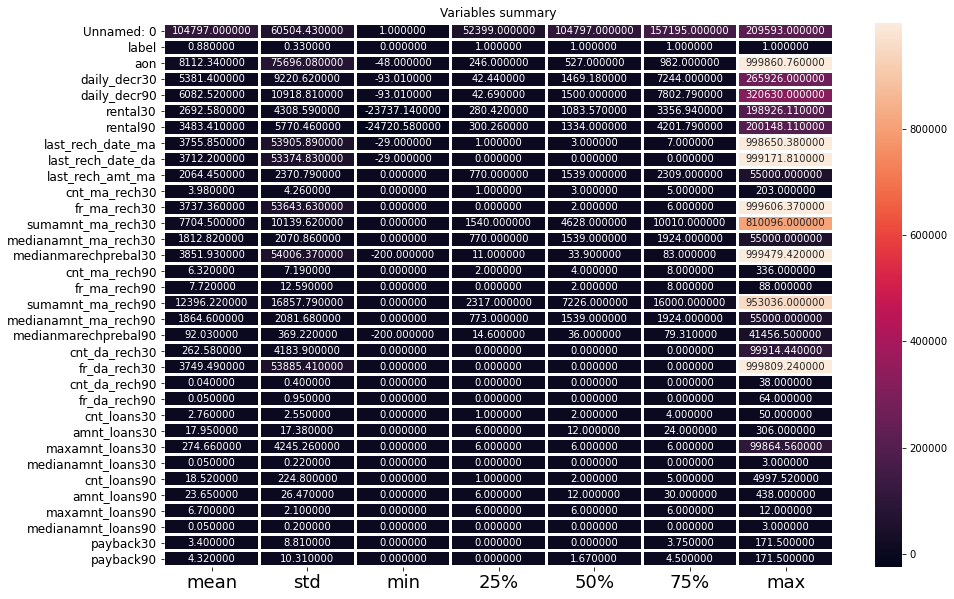

In [11]:
plt.figure(figsize=(15,10))
sns.heatmap(round(df.describe()[1:].transpose(),2),linewidth=2,annot=True,fmt='f')
plt.xticks(fontsize=18)
plt.yticks(fontsize=12)
plt.title("Variables summary")
plt.show()

From the above plotting we are determining mean, standard deviation, minimum and maximum values of above columns. 
It helps us further in data cleaning.

In [12]:
df.isnull().sum()  # to check null values

Unnamed: 0              0
label                   0
msisdn                  0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pcircle                 0
pdate                   0
dtype: int64

#### There is no null values in the dataset

In [13]:
# to know all types of unique values
df['Unnamed: 0'].unique()

array([     1,      2,      3, ..., 209591, 209592, 209593], dtype=int64)

In [14]:
# dropping column because its just a serial number from first to last
df=df.drop(columns='Unnamed: 0')

In [15]:
# to know all types of unique values
df['pcircle'].unique()

array(['UPW'], dtype=object)

In [16]:
# dropping column because it has one value throughout the column
df=df.drop(columns='pcircle')

In [17]:
# dropping column as it has phone numbers of customers which is not useful for prediction
df=df.drop(columns='msisdn')

In [18]:
# to change format
df['pdate']=pd.to_datetime(df['pdate'])
df['pdate']

0        2016-07-20
1        2016-08-10
2        2016-08-19
3        2016-06-06
4        2016-06-22
            ...    
209588   2016-06-17
209589   2016-06-12
209590   2016-07-29
209591   2016-07-25
209592   2016-07-07
Name: pdate, Length: 209593, dtype: datetime64[ns]

#### Year is same throughout so we will not add it while splitting.

In [19]:
# splitting Date into Month and Day
df['Month']=df['pdate'].dt.month
df['Day']=df['pdate'].dt.day

In [20]:
# dropping 'pdate' column
df.drop('pdate',axis=1,inplace=True)

### Univariate Analysis

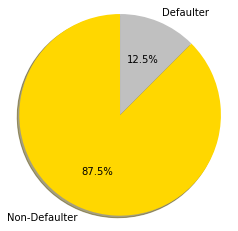

In [21]:
# to visualize column 'label' in pie chart

labels = ['Non-Defaulter', 'Defaulter']

fig, ax = plt.subplots(figsize=(4,4))
colors = ['gold', 'silver']
ax.pie(df['label'].value_counts(),  labels=labels, autopct='%1.1f%%',shadow=True, startangle=90, colors=colors)
ax.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

#### Defaulter users not paying back the loan amount within 5 days of issuing is 12.5%.

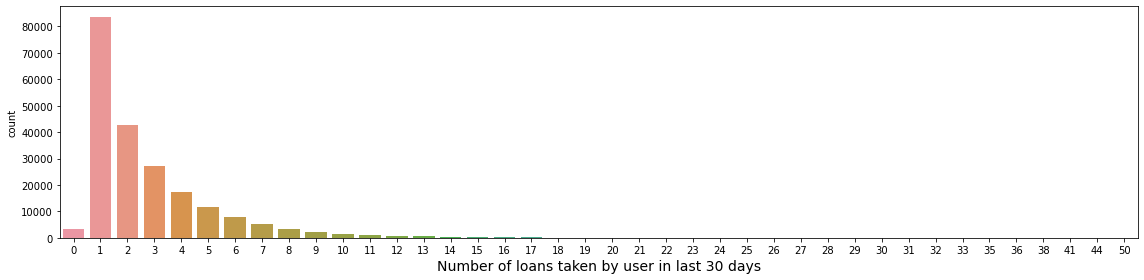

In [22]:
# Lets visualize the 'cnt_loans30' column 
plt.figure(figsize=(16,4))
sns.countplot(df['cnt_loans30']) 
plt.xlabel('Number of loans taken by user in last 30 days',fontsize=14)
plt.tight_layout()

#### Maximum times users taking loan in last 30 days:
    
Only 1 time - Approx 40%

Only 2 times - 20%

Only 3 times - Approx 13%

Only 4 times- 8%

Only 5 times- 5%

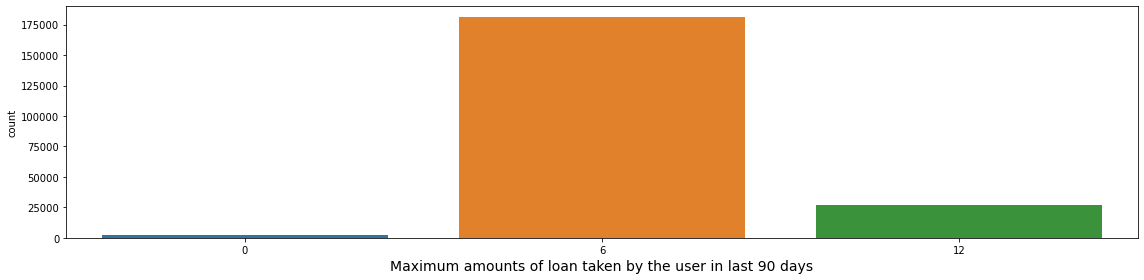

In [23]:
# Lets visualize the 'medianamnt_loans30' column 
plt.figure(figsize=(16,4))
sns.countplot(df['maxamnt_loans90']) 
plt.xlabel('Maximum amounts of loan taken by the user in last 90 days',fontsize=14)
plt.tight_layout()

#### Users have taken loan mostly where the payback loan amount is 6 (in Indonesian Rupiah) than the payback loan amount 12 (in Indonesian Rupiah). 

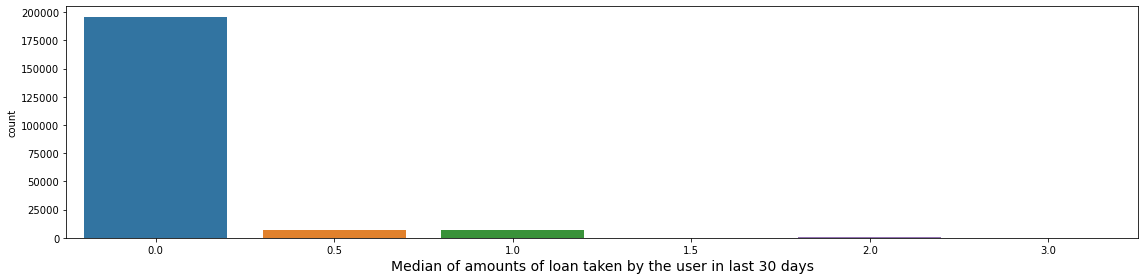

In [24]:
# Lets visualize the 'medianamnt_loans30' column 
plt.figure(figsize=(16,4))
sns.countplot(df['medianamnt_loans30']) 
plt.xlabel('Median of amounts of loan taken by the user in last 30 days',fontsize=14)
plt.tight_layout()

In [25]:
# storing dataframe value into variable
rental30=df['rental30']

In [26]:
rental=[]  # empty list
for i in rental30:  # running loop
    if(i<=0):
        rental.append('no balance')  # adding the result according to the condition
    elif (i>0 and i<=12655):
        rental.append('low balance')
    elif (i>=12655 and i<118766):
        rental.append('average balance')
    elif (i>118766):
        rental.append('high balance')

In [27]:
# storing the value back to dataframe after categorizing
df['rental30']=rental 

In [28]:
df['rental30'].unique()

array(['low balance', 'no balance', 'average balance', 'high balance'],
      dtype=object)

In [29]:
df['rental30'].value_counts()

low balance        188381
no balance          13194
average balance      8015
high balance            3
Name: rental30, dtype: int64

<AxesSubplot:xlabel='rental30', ylabel='count'>

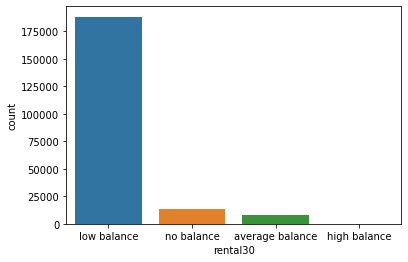

In [30]:
sns.countplot(x='rental30',data=df)

#### Approx 90% users has maintained low balance, 3% users have maintained average balance and 6% users have no balance.

### Bivariate Analysis

Text(0.5, 1.0, 'Maximum amount of loan taken by the user in last 90 days')

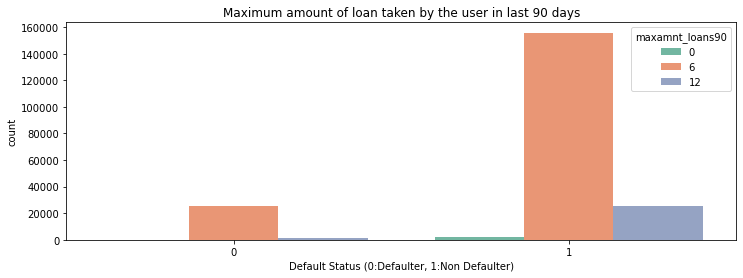

In [31]:
plt.figure(figsize=(12,4))
sns.countplot(x="label",hue="maxamnt_loans90", data = df,palette='Set2')
plt.xlabel('Default Status (0:Defaulter, 1:Non Defaulter)')
plt.title('Maximum amount of loan taken by the user in last 90 days')

#### In the period of 90 days, there is less case of defaulters where the users payback loan amount are 6 & 12(in Indonesian Rupiah).

<AxesSubplot:xlabel='rental30', ylabel='count'>

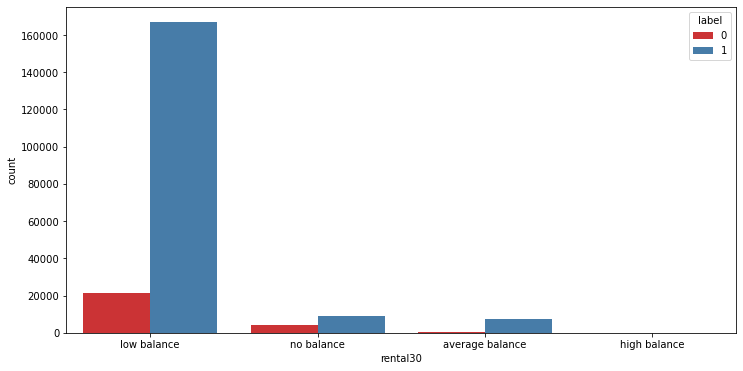

In [32]:
plt.figure(figsize=(12,6))
sns.countplot(x='rental30',hue='label',data=df,palette='Set1')

#### Lots of users those who are maintaining low balance is in defaulter list.

Text(0.5, 1.0, 'Number of times main account got recharged in last 30 days VS Month')

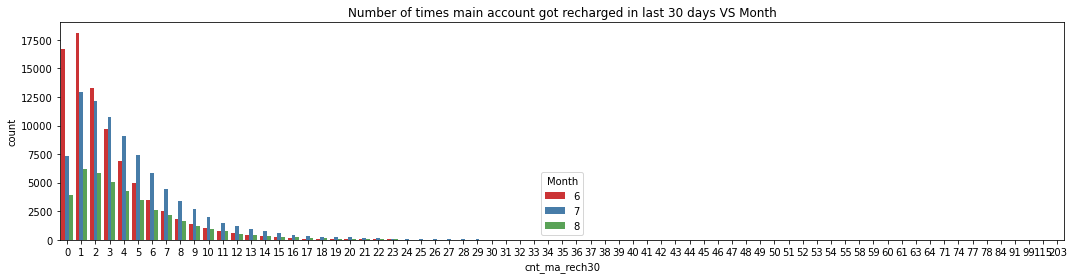

In [33]:
# lets visualize
plt.subplots(figsize=(18,4))
sns.countplot(x='cnt_ma_rech30', hue='Month', data=df, palette='Set1')
plt.title('Number of times main account got recharged in last 30 days VS Month')

#### According to the plot, maximum times users recharge their account in the month of July followed by then June.

Text(0.5, 1.0, 'Balance category over last 30 days vs total amount of loans taken by user in last 30 days')

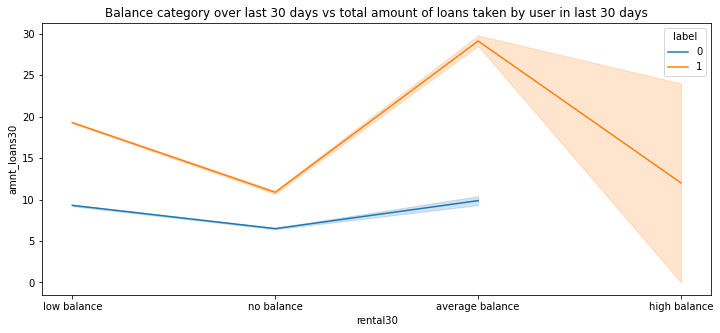

In [34]:
plt.figure(figsize=(12,5))
sns.lineplot(x='rental30',y='amnt_loans30',hue='label',data=df)
plt.title('Balance category over last 30 days vs total amount of loans taken by user in last 30 days')

#### Users taking less amount of loans are in defaulter list. 

In [35]:
# check the number of loans taken by user in last 90 days
category=[(df['cnt_loans90'] <=0),df['cnt_loans90'].between(0,2),(df['cnt_loans90'] > 2)]
value= ['No Loans Taken', 'Average number of loans Taken','Too much loans taken']
df['Loans_Frequency']=np.select(category,value)

In [36]:
df['Loans_Frequency'].value_counts()

Average number of loans Taken    111148
Too much loans taken              96409
No Loans Taken                     2036
Name: Loans_Frequency, dtype: int64

In [37]:
# Mapping the balance groups with precentage value with respect to label 
LoansFrequencypercent = pd.crosstab(df['label'],df['Loans_Frequency']).apply(lambda x: x/x.sum()*100)
LoansFrequencypercent = LoansFrequencypercent.transpose()
LoansFrequencypercent

label,0,1
Loans_Frequency,,
Average number of loans Taken,20.649944,79.350056
No Loans Taken,0.000000,100.000000
Too much loans taken,3.329565,96.670435


(array([0, 1, 2]),
 [Text(0, 0, 'Average number of loans Taken'),
  Text(1, 0, 'No Loans Taken'),
  Text(2, 0, 'Too much loans taken')])

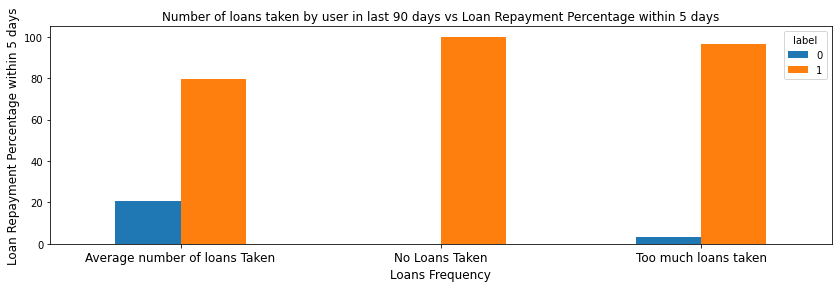

In [38]:
LoansFrequencypercent.plot(kind='bar',figsize=(14,4))
plt.title('Number of loans taken by user in last 90 days vs Loan Repayment Percentage within 5 days',fontsize=12)
plt.ylabel('Loan Repayment Percentage within 5 days',fontsize=12)
plt.xlabel('Loans Frequency',fontsize=12)
plt.xticks(rotation = 'horizontal',fontsize=12)

#### Inferences from above plot

1. Around 98% Users taking too much loans are non-defaulters as they repay the loan within stipulated time.

2. Users taking average number of loans which is approx 20% are defaulters.

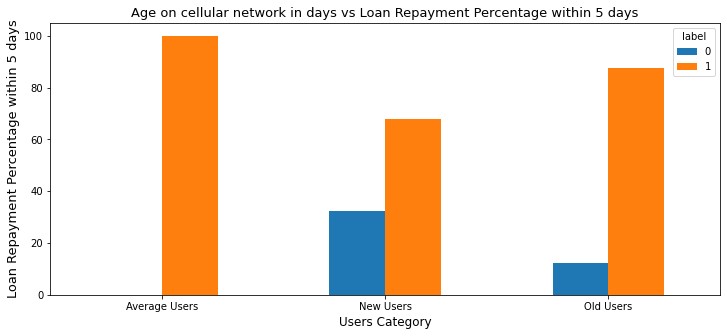

In [39]:
# visualizing aon (age on cellular network in days) by categorizing it

category=[(df['aon'] <2),df['aon'].between(2,5),(df['aon'] > 5)]
value= ['New Users','Average Users','Old Users']
df['Users_Category']=np.select(category,value)

# mapping the balance groups with precentage value with respect to label 

UsersCategorypercent = pd.crosstab(df['label'],df['Users_Category']).apply(lambda x: x/x.sum()*100)
UsersCategorypercent = UsersCategorypercent.transpose()
UsersCategorypercent

UsersCategorypercent.plot(kind='bar',figsize=(12,5))
plt.title('Age on cellular network in days vs Loan Repayment Percentage within 5 days',fontsize=13)
plt.ylabel('Loan Repayment Percentage within 5 days',fontsize=13)
plt.xlabel('Users Category',fontsize=12)
plt.xticks(rotation = 'horizontal',fontsize=10);

####  New Users category has lots of defaulters around 35%.

In [40]:
# converting objects into integers
lab_enc = LabelEncoder()
list1 = ['rental30','Loans_Frequency','Users_Category']
for val in list1:
    df[val] = lab_enc.fit_transform(df[val].astype(str))

In [41]:
# checking if all features converted into machine language
df.head()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,Month,Day,Loans_Frequency,Users_Category
0,0,272.0,3055.050000,3065.150000,2,260.13,2.0,0.0,1539,2,...,2.0,12,6,0.0,29.000000,29.000000,7,20,0,2
1,1,712.0,12122.000000,12124.750000,2,3691.26,20.0,0.0,5787,1,...,1.0,12,12,0.0,0.000000,0.000000,8,10,0,2
2,1,535.0,1398.000000,1398.000000,2,900.13,3.0,0.0,1539,1,...,1.0,6,6,0.0,0.000000,0.000000,8,19,0,2
3,1,241.0,21.228000,21.228000,2,159.42,41.0,0.0,947,0,...,2.0,12,6,0.0,0.000000,0.000000,6,6,0,2
4,1,947.0,150.619333,150.619333,2,1098.90,4.0,0.0,2309,7,...,7.0,42,6,0.0,2.333333,2.333333,6,22,2,2


In [42]:
last_column = df.pop('label')
df.insert(36, 'label', last_column)  # inserting label at the last column as its our target variable

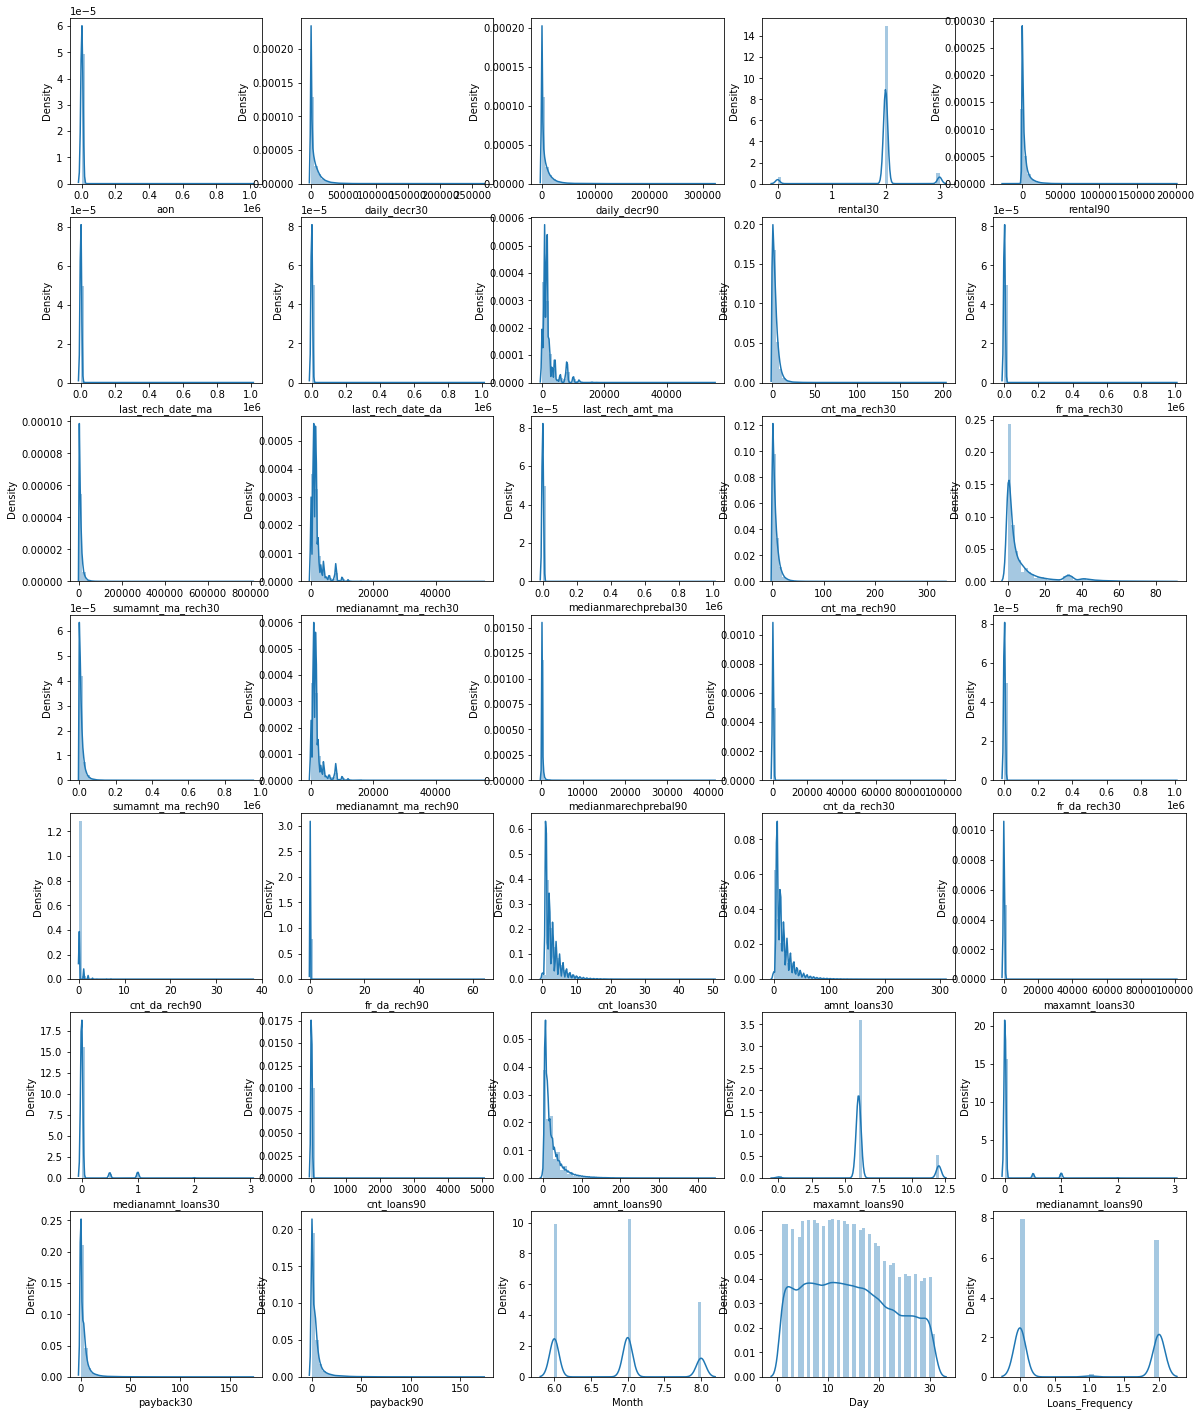

In [43]:
# lets visualize all the columns 
plt.figure(figsize=(20,25), facecolor='white')
plotnumber=1
for column in df:
    if plotnumber<=35:
        ax=plt.subplot(7,5,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.show()

#### Skewness can be seen in all continous features/variables

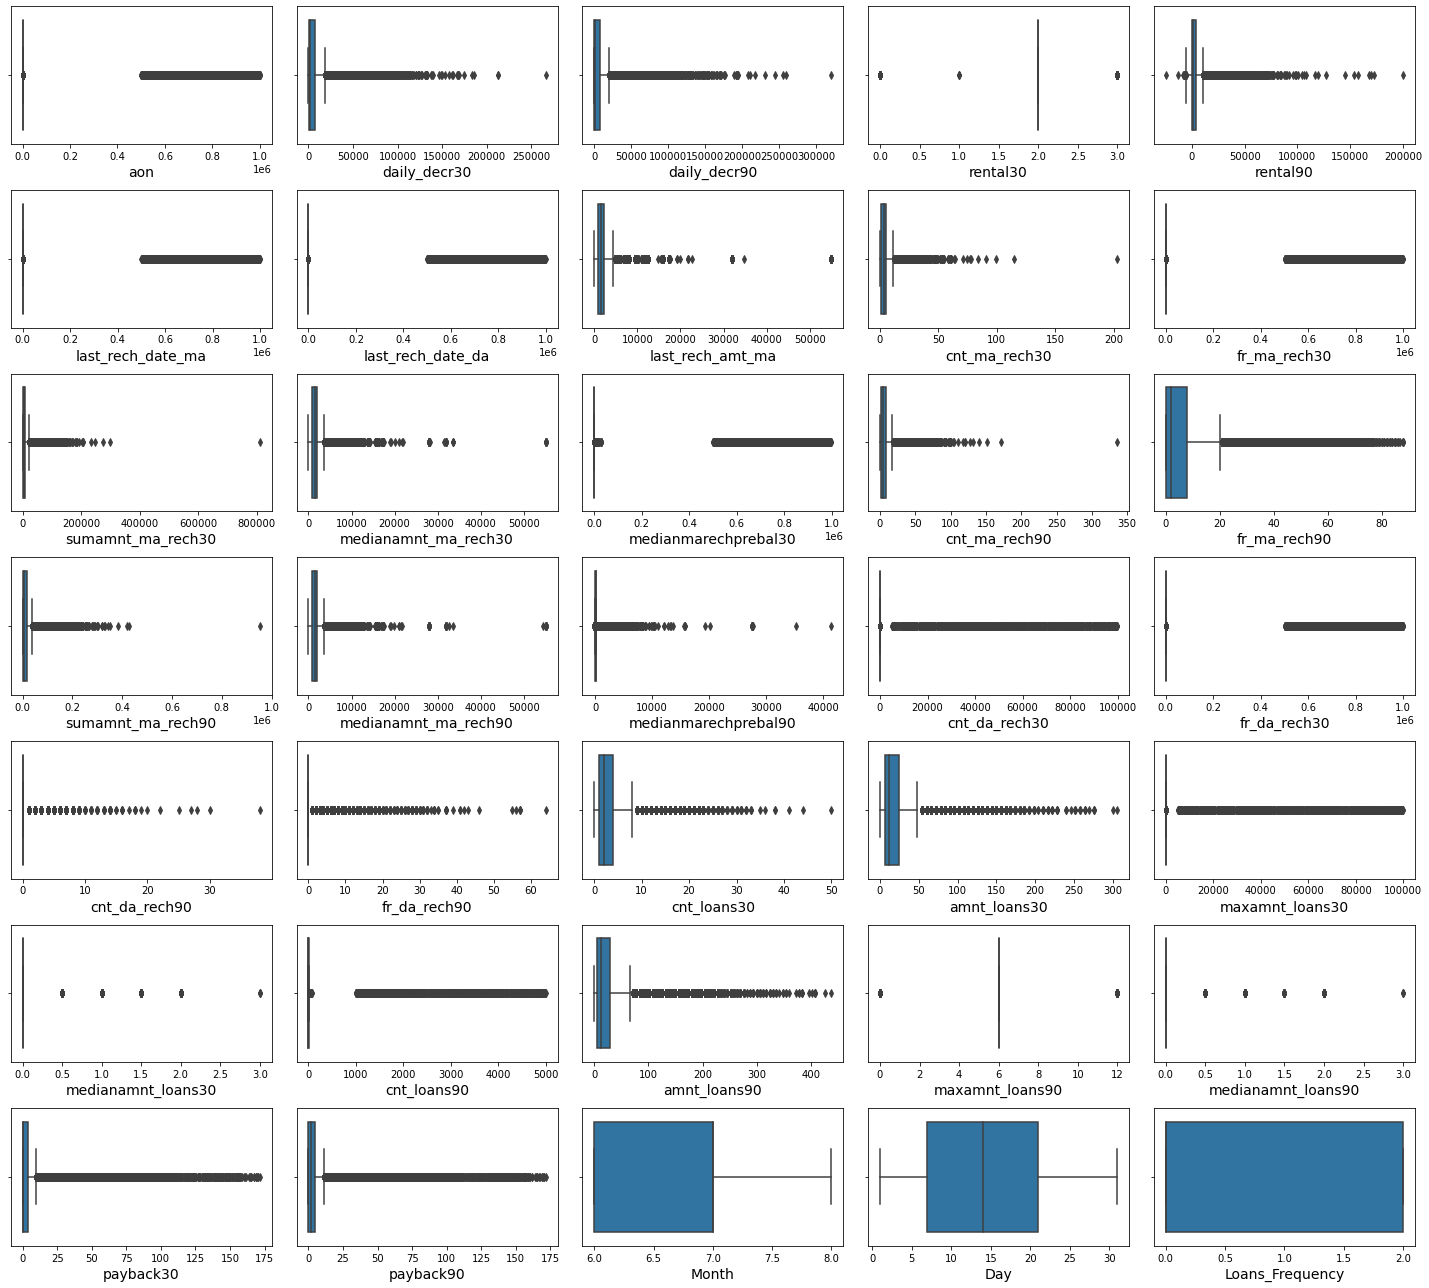

In [44]:
# Lets visualize the columns in boxplot to check outliers
plt.figure(figsize=(20,18))
plotnumber=1
for col in df:
    if plotnumber<=35:
        plt.subplot(7,5,plotnumber)
        sns.boxplot(df[col])
        plt.xlabel(col,fontsize=14)
        plotnumber=plotnumber+1
plt.tight_layout()

In [45]:
# Using 1.5 IQR method to remove outliers

def outlier(df,col):
    lower_boundary=df[col].mean()-1.5*df[col].std()
    upper_boundary=df[col].mean()+1.5*df[col].std()
    print(lower_boundary,upper_boundary)
    df.loc[df[col]> upper_boundary,col] = upper_boundary
    df.loc[df[col]<lower_boundary,col]=lower_boundary

In [46]:
outlier(df,'daily_decr30')
outlier(df,'daily_decr90')
outlier(df,'rental90')
outlier(df,'last_rech_date_ma')
outlier(df,'last_rech_date_da')
outlier(df,'cnt_ma_rech30')
outlier(df,'fr_ma_rech30')
outlier(df,'sumamnt_ma_rech30')
outlier(df,'medianamnt_ma_rech30')
outlier(df,'medianmarechprebal30')
outlier(df,'medianamnt_ma_rech90')
outlier(df,'medianmarechprebal90')
outlier(df,'cnt_da_rech30')
outlier(df,'fr_da_rech30')
outlier(df,'maxamnt_loans30')
outlier(df,'medianmarechprebal90')
outlier(df,'medianamnt_loans30')
outlier(df,'cnt_loans30')
outlier(df,'cnt_loans90')
outlier(df,'cnt_da_rech30')
outlier(df,'cnt_da_rech90')
outlier(df,'amnt_loans30')
outlier(df,'amnt_loans90')
outlier(df,'medianamnt_loans90')
outlier(df,'payback30')
outlier(df,'payback90')

-8449.532810960003 19212.337388787695
-10295.70408294096 22460.734218438825
-5172.2853838623405 12139.098452332815
-77102.99054494023 84614.6861450609
-76350.04722379128 83774.45306515065
-2.4060769239367867 10.362191870523743
-76728.08263765625 84202.79287897551
-7504.93141368562 22913.9337276942
-1293.4789776813461 4919.114881552182
-77157.63370718189 84861.48959175909
-1257.925173887572 4987.11681673824
-461.7979459984726 645.8490289067804
-6013.268856933075 6538.425076276633
-77078.6280220136 84577.61691525711
-6093.238224338791 6642.555718323347
-107.1184742531326 260.9060459880809
-0.2730294297143183 0.38108647360414294
-1.0727727192086087 6.590733719814545
-318.6752150542793 355.71705326732035
-657.8573516710744 723.128689576951
-0.5548387795948586 0.637828192409218
-8.117590759667479 44.02163335650993
-16.059393072959192 63.35018999842903
-0.2549599266256339 0.3471147218716583
-9.821766357115493 16.619419237831746
-11.140676600464348 19.78364705193181


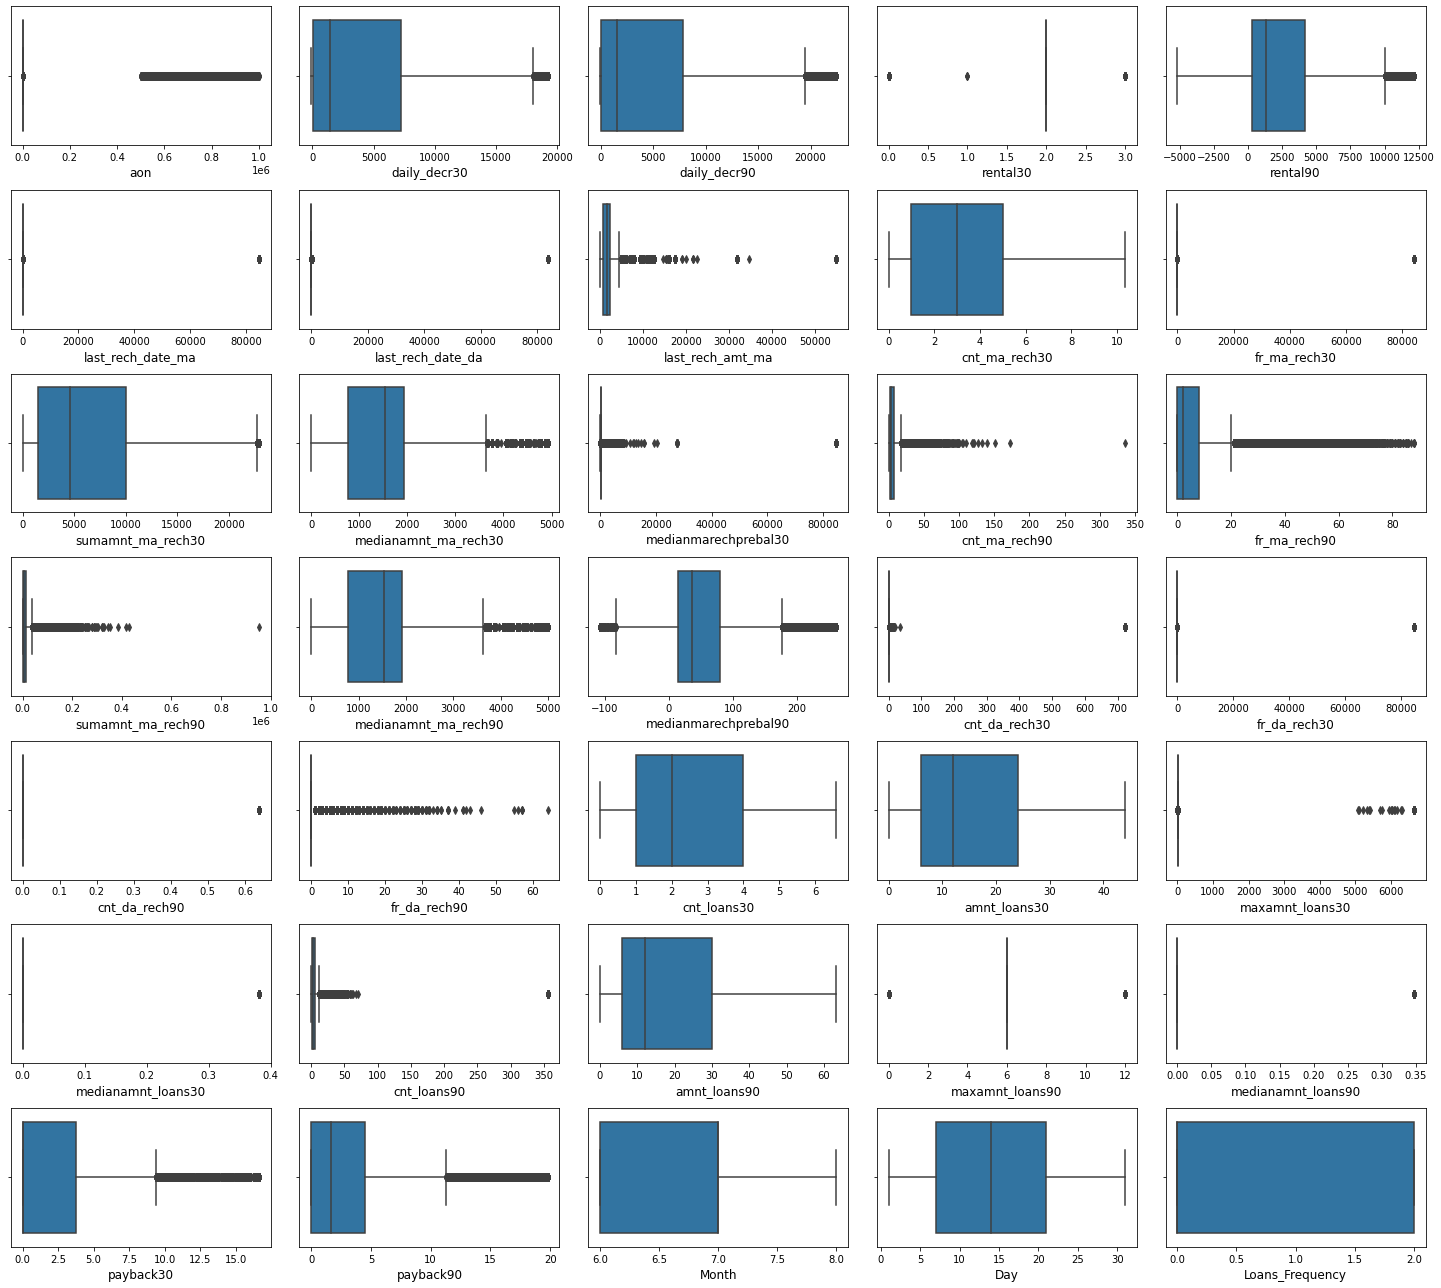

In [47]:
# Again visualizing through boxplot after removing outliers

plt.figure(figsize=(20,18))
plot=1
for col in df:
    if plot<=35:
        plt.subplot(7,5,plot)
        sns.boxplot(df[col])
        plt.xlabel(col,fontsize=12)
        plot=plot+1
plt.tight_layout()

In [48]:
# to see skewness for each column 
df.skew()

aon                     10.392949
daily_decr30             1.307751
daily_decr90             1.394601
rental30                -2.337321
rental90                 1.418766
last_rech_date_ma       14.042458
last_rech_date_da       14.042483
last_rech_amt_ma         3.781149
cnt_ma_rech30            0.819273
fr_ma_rech30            14.042495
sumamnt_ma_rech30        1.093038
medianamnt_ma_rech30     1.242453
medianmarechprebal30    13.981140
cnt_ma_rech90            3.425254
fr_ma_rech90             2.285423
sumamnt_ma_rech90        4.897950
medianamnt_ma_rech90     1.300286
medianmarechprebal90     1.461606
cnt_da_rech30           14.041931
fr_da_rech30            14.042513
cnt_da_rech90            6.006577
fr_da_rech90            28.988083
cnt_loans30              0.984435
amnt_loans30             1.024397
maxamnt_loans30         14.048549
medianamnt_loans30       3.447735
cnt_loans90             13.515378
amnt_loans90             1.160254
maxamnt_loans90          1.678304
medianamnt_loa

#### We don't want to lose more data by treating skewness, so we will avoid and move on otherwise it will show null values in some features. Hence will create a problem.

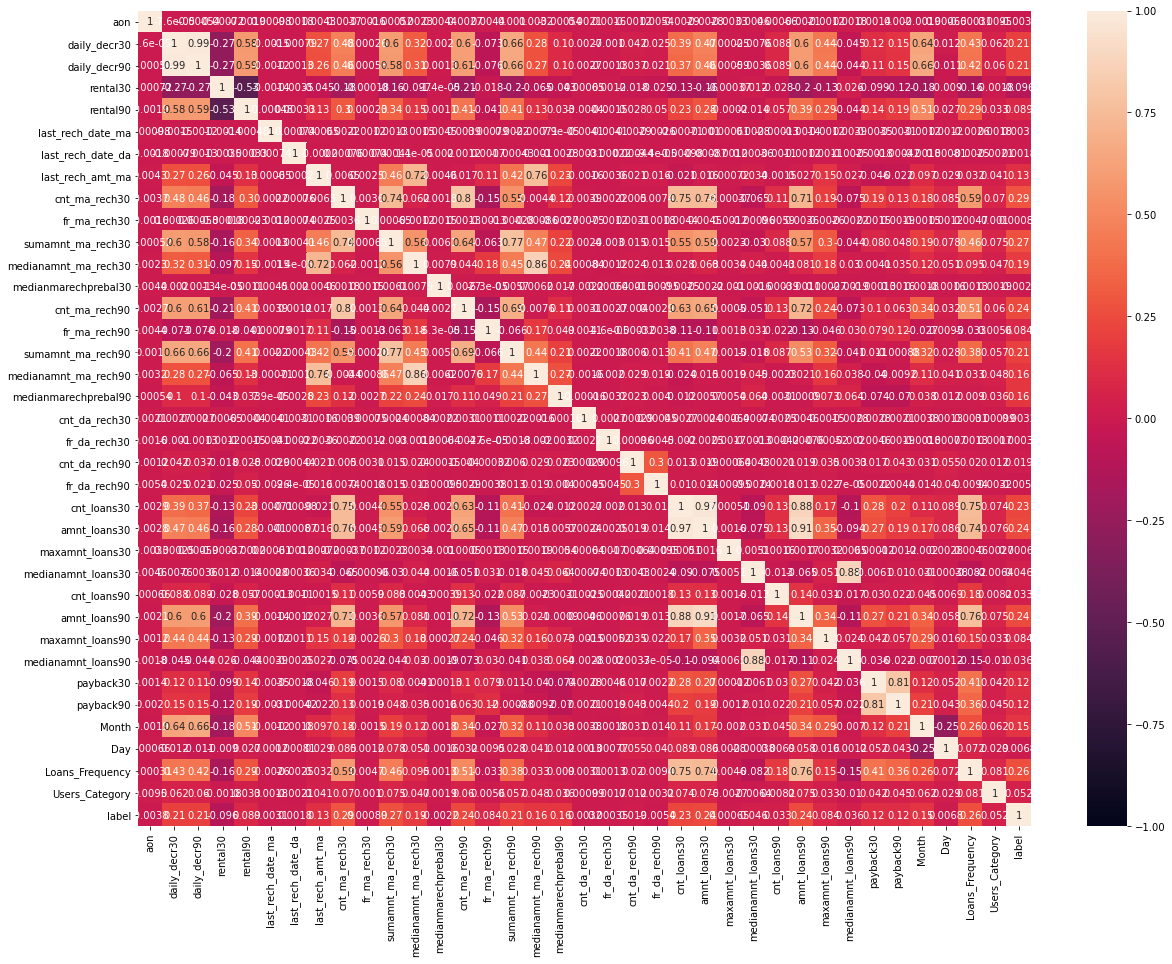

In [49]:
# plotting heatmap to observe the correlation
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(), annot=True, vmin=-1.0, vmax=1.0)
plt.show()

Loans_Frequency,amnt_loans90,amnt_loans30,cnt_loans30,cnt_ma_rech30,sumamnt_ma_rech30 and sumamnt_ma_rech90 are showing corelation with target variable.

In [50]:
y = df['label']
X = df.drop('label', axis = 1)

In [51]:
# Data Scaling.  Formula Z=(x-mean)/std
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)

In [52]:
X_scaled # to see representation of X_scaled data, how it looks like

array([[-0.10357685, -0.24723158, -0.28931561, ...,  0.6637208 ,
        -0.93656803,  0.08873   ],
       [-0.09776412,  1.24840361,  1.00745573, ..., -0.52127058,
        -0.93656803,  0.08873   ],
       [-0.10010243, -0.52056961, -0.52794782, ...,  0.54522166,
        -0.93656803,  0.08873   ],
       ...,
       [-0.09378769,  1.2023997 ,  0.97590816, ...,  1.73021304,
         1.07825438,  0.08873   ],
       [-0.08428915,  1.30881466,  1.07181335, ...,  1.25621649,
         1.07825438,  0.08873   ],
       [-0.08628398, -0.0106352 , -0.07895026, ..., -0.87676799,
        -0.93656803,  0.08873   ]])

In [53]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(X_scaled, i) for i in range (X_scaled.shape[1])]
vif["features"] = X.columns

#let's check the values
vif

,vif,features
0,1.000313,aon
1,43.527058,daily_decr30
2,46.499809,daily_decr90
3,1.434307,rental30
4,2.172296,rental90
5,1.000172,last_rech_date_ma
6,1.000144,last_rech_date_da
7,2.661222,last_rech_amt_ma
8,6.965986,cnt_ma_rech30
9,1.000221,fr_ma_rech30


#### Multicollinearity problem exists. 
#### cnt_loans30, amnt_loans30, daily_decr30 and daily_decr90 are inter corelated to each other.

In [54]:
# dropping columns to remove multicollinearity
df=df.drop(columns=['amnt_loans30','daily_decr90'])

In [55]:
# Split data into train and test. Model will be built on training data and tested on test data
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size = 0.25, random_state = 101)

## Logistic Regression

In [56]:
log_reg = LogisticRegression()
log_reg.fit(x_train,y_train)

LogisticRegression()

In [57]:
y_pred = log_reg.predict(x_test)

In [58]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.883013034599897

In [59]:
# Confusion Matrix
conf_mat =confusion_matrix(y_test,y_pred)
conf_mat

array([[  841,  5748],
       [  382, 45428]], dtype=int64)

In [60]:
print('\n----------------Classification Report-------------------')
print (classification_report(y_test,y_pred,digits=2))


----------------Classification Report-------------------
              precision    recall  f1-score   support

           0       0.69      0.13      0.22      6589
           1       0.89      0.99      0.94     45810

    accuracy                           0.88     52399
   macro avg       0.79      0.56      0.58     52399
weighted avg       0.86      0.88      0.85     52399



In [61]:
### Cross Validation score to check if the model is overfitting
score= cross_val_score(log_reg,X_scaled,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.88451537 0.88463465 0.88535032 0.88572928 0.88527602]
0.8851011283918799
0.00045781297503614073


## DecisionTree Classifier

In [62]:
dt_clf = DecisionTreeClassifier()
dt_clf.fit(x_train,y_train)
pred=dt_clf.predict(x_train)
dt_clf_report = pd.DataFrame(classification_report(y_train,pred, output_dict=True))

print("\n===================Train Result======================")

print(f"Accuracy Score: {accuracy_score(y_train,pred) * 100:.2f}%")
print("______________________________________________")
print(f"CLASSIFICATION REPORT:\n{dt_clf_report}")
print("______________________________________________")
print(f"Confusion Matrix:\n {confusion_matrix(y_train,pred)}\n")

#*********************** Test Score *************************

pred = dt_clf.predict(x_test)  
dt_clf_report = pd.DataFrame(classification_report(y_test,pred, output_dict=True))
print("\n===================Test Result======================")
print(f"Accuracy Score: {accuracy_score(y_test,pred) * 100:.2f}%")
print("______________________________________________")
print(f"CLASSIFICATION REPORT:\n{dt_clf_report}")
print("______________________________________________")
print(f"Confusion Matrix:\n {confusion_matrix(y_test,pred)}\n")


===================Train Result======================
Accuracy Score: 100.00%
______________________________________________
CLASSIFICATION REPORT:
                      0              1  accuracy      macro avg   weighted avg
precision      0.999847       1.000000  0.999981       0.999923       0.999981
recall         1.000000       0.999978  0.999981       0.999989       0.999981
f1-score       0.999923       0.999989  0.999981       0.999956       0.999981
support    19573.000000  137621.000000  0.999981  157194.000000  157194.000000
______________________________________________
Confusion Matrix:
 [[ 19573      0]
 [     3 137618]]


===================Test Result======================
Accuracy Score: 88.67%
______________________________________________
CLASSIFICATION REPORT:
                     0             1  accuracy     macro avg  weighted avg
precision     0.546772      0.938850  0.886696      0.742811      0.889547
recall        0.578388      0.931041  0.886696      0.754

In [63]:
# Cross Validation score to check if the model is overfitting or underfitting
score= cross_val_score(dt_clf,X_scaled,y,cv=5)

print("\n=============== Cross Validation Score ===================")
print(score)
print(score.mean())
print(score.std())


=============== Cross Validation Score ===================
[0.88265464 0.88277392 0.8833226  0.88231786 0.88451262]
0.8831163283020995
0.0007694318397515075


## Random Forest Classifier

In [64]:
rand_clf = RandomForestClassifier(random_state=101)
rand_clf.fit(x_train,y_train)
pred=dt_clf.predict(x_train)
rand_clf_report = pd.DataFrame(classification_report(y_train,pred, output_dict=True))

print("\n===================Train Result======================")

print(f"Accuracy Score: {accuracy_score(y_train,pred) * 100:.2f}%")
print("______________________________________________")
print(f"CLASSIFICATION REPORT:\n{rand_clf_report}")
print("______________________________________________")
print(f"Confusion Matrix:\n {confusion_matrix(y_train,pred)}\n")

#*********************** Test Score *************************

pred = rand_clf.predict(x_test)  
rand_clf_report = pd.DataFrame(classification_report(y_test,pred, output_dict=True))
print("\n===================Test Result======================")
print(f"Accuracy Score: {accuracy_score(y_test,pred) * 100:.2f}%")
print("______________________________________________")
print(f"CLASSIFICATION REPORT:\n{rand_clf_report}")
print("______________________________________________")
print(f"Confusion Matrix:\n {confusion_matrix(y_test,pred)}\n")


===================Train Result======================
Accuracy Score: 100.00%
______________________________________________
CLASSIFICATION REPORT:
                      0              1  accuracy      macro avg   weighted avg
precision      0.999847       1.000000  0.999981       0.999923       0.999981
recall         1.000000       0.999978  0.999981       0.999989       0.999981
f1-score       0.999923       0.999989  0.999981       0.999956       0.999981
support    19573.000000  137621.000000  0.999981  157194.000000  157194.000000
______________________________________________
Confusion Matrix:
 [[ 19573      0]
 [     3 137618]]


===================Test Result======================
Accuracy Score: 92.12%
______________________________________________
CLASSIFICATION REPORT:
                     0             1  accuracy     macro avg  weighted avg
precision     0.779622      0.934149  0.921182      0.856886      0.914717
recall        0.520261      0.978847  0.921182      0.749

In [65]:
# Cross Validation score to check if the model is overfitting or underfitting
score= cross_val_score(rand_clf,X_scaled,y,cv=5)

print("\n=============== Cross Validation Score ===================")
print(score)
print(score.mean())
print(score.std())


=============== Cross Validation Score ===================
[0.92113361 0.92068036 0.92041795 0.92215755 0.92129873]
0.9211376390480295
0.0005988711123281923


## KNN Classifier

In [66]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
pred=knn.predict(x_train)
knn_report = pd.DataFrame(classification_report(y_train,pred, output_dict=True))

print("\n===================Train Result======================")

print(f"Accuracy Score: {accuracy_score(y_train,pred) * 100:.2f}%")
print("______________________________________________")
print(f"CLASSIFICATION REPORT:\n{knn_report}")
print("______________________________________________")
print(f"Confusion Matrix:\n {confusion_matrix(y_train,pred)}\n")

#*********************** Test Score *************************

pred = knn.predict(x_test)  
knn_report = pd.DataFrame(classification_report(y_test,pred, output_dict=True))
print("\n===================Test Result======================")
print(f"Accuracy Score: {accuracy_score(y_test,pred) * 100:.2f}%")
print("______________________________________________")
print(f"CLASSIFICATION REPORT:\n{knn_report}")
print("______________________________________________")
print(f"Confusion Matrix:\n {confusion_matrix(y_test,pred)}\n")


===================Train Result======================
Accuracy Score: 91.90%
______________________________________________
CLASSIFICATION REPORT:
                      0              1  accuracy      macro avg   weighted avg
precision      0.742746       0.936380  0.919017       0.839563       0.912269
recall         0.534869       0.973652  0.919017       0.754261       0.919017
f1-score       0.621896       0.954652  0.919017       0.788274       0.913219
support    19573.000000  137621.000000  0.919017  157194.000000  157194.000000
______________________________________________
Confusion Matrix:
 [[ 10469   9104]
 [  3626 133995]]


===================Test Result======================
Accuracy Score: 88.95%
______________________________________________
CLASSIFICATION REPORT:
                     0             1  accuracy     macro avg  weighted avg
precision     0.583948      0.919898  0.889464      0.751923      0.877654
recall        0.420701      0.956887  0.889464      0.6887

In [67]:
# Cross Validation score to check if the model is overfitting or underfitting
score= cross_val_score(knn,X_scaled,y,cv=5)

print("\n=============== Cross Validation Score ===================")
print(score)
print(score.mean())
print(score.std())


=============== Cross Validation Score ===================
[0.89145733 0.89081324 0.88921491 0.89279069 0.892075  ]
0.8912702348132836
0.001218820991840818


## Support-Vector Machines

In [69]:
svc = SVC(kernel = 'rbf',C=1)
svc.fit(x_train,y_train)
pred=svc.predict(x_train)
svc_report = pd.DataFrame(classification_report(y_train,pred, output_dict=True))

print("\n===================Train Result======================")

print(f"Accuracy Score: {accuracy_score(y_train,pred) * 100:.2f}%")
print("______________________________________________")
print(f"CLASSIFICATION REPORT:\n{svc_report}")
print("______________________________________________")
print(f"Confusion Matrix:\n {confusion_matrix(y_train,pred)}\n")

#*********************** Test Score *************************

pred = svc.predict(x_test)  
svc_report = pd.DataFrame(classification_report(y_test,pred, output_dict=True))
print("\n===================Test Result======================")
print(f"Accuracy Score: {accuracy_score(y_test,pred) * 100:.2f}%")
print("______________________________________________")
print(f"CLASSIFICATION REPORT:\n{svc_report}")
print("______________________________________________")
print(f"Confusion Matrix:\n {confusion_matrix(y_test,pred)}\n")


===================Train Result======================
Accuracy Score: 89.47%
______________________________________________
CLASSIFICATION REPORT:
                      0              1  accuracy      macro avg   weighted avg
precision      0.711155       0.903493  0.894729       0.807324       0.879544
recall         0.260256       0.984966  0.894729       0.622611       0.894729
f1-score       0.381059       0.942472  0.894729       0.661766       0.872568
support    19573.000000  137621.000000  0.894729  157194.000000  157194.000000
______________________________________________
Confusion Matrix:
 [[  5094  14479]
 [  2069 135552]]


===================Test Result======================
Accuracy Score: 89.07%
______________________________________________
CLASSIFICATION REPORT:
                     0             1  accuracy     macro avg  weighted avg
precision     0.684503      0.900326  0.890704      0.792415      0.873187
recall        0.242677      0.983912  0.890704      0.6132

In [70]:
# Cross Validation score to check if the model is overfitting or underfitting
score= cross_val_score(svc,X_scaled,y,cv=5)

print("\n=============== Cross Validation Score ===================")
print(score)
print(score.mean())
print(score.std())


=============== Cross Validation Score ===================
[0.89293638 0.89226842 0.89331807 0.89438905 0.89353023]
0.8932884272967913
0.0006978615854187262


## Gradient Boosting Classifier

In [71]:
gbdt_clf = GradientBoostingClassifier()
gbdt_clf.fit(x_train,y_train)
pred=gbdt_clf.predict(x_train)
gbdt_clf_report = pd.DataFrame(classification_report(y_train,pred, output_dict=True))

print("\n===================Train Result======================")

print(f"Accuracy Score: {accuracy_score(y_train,pred) * 100:.2f}%")
print("______________________________________________")
print(f"CLASSIFICATION REPORT:\n{gbdt_clf_report}")
print("______________________________________________")
print(f"Confusion Matrix:\n {confusion_matrix(y_train,pred)}\n")

#*********************** Test Score *************************

pred = gbdt_clf.predict(x_test)  
gbdt_clf_report = pd.DataFrame(classification_report(y_test,pred, output_dict=True))
print("\n===================Test Result======================")
print(f"Accuracy Score: {accuracy_score(y_test,pred) * 100:.2f}%")
print("______________________________________________")
print(f"CLASSIFICATION REPORT:\n{gbdt_clf_report}")
print("______________________________________________")
print(f"Confusion Matrix:\n {confusion_matrix(y_test,pred)}\n")


===================Train Result======================
Accuracy Score: 91.98%
______________________________________________
CLASSIFICATION REPORT:
                      0              1  accuracy      macro avg   weighted avg
precision      0.788731       0.930634  0.919755       0.859683       0.912965
recall         0.485618       0.981500  0.919755       0.733559       0.919755
f1-score       0.601126       0.955390  0.919755       0.778258       0.911279
support    19573.000000  137621.000000  0.919755  157194.000000  157194.000000
______________________________________________
Confusion Matrix:
 [[  9505  10068]
 [  2546 135075]]


===================Test Result======================
Accuracy Score: 91.85%
______________________________________________
CLASSIFICATION REPORT:
                     0             1  accuracy     macro avg  weighted avg
precision     0.788753      0.929330  0.918548      0.859042      0.911653
recall        0.481105      0.981467  0.918548      0.7312

In [72]:
# Cross Validation score to check if the model is overfitting or underfitting
score= cross_val_score(gbdt_clf,X_scaled,y,cv=5)

print("\n=============== Cross Validation Score ===================")
print(score)
print(score.mean())
print(score.std())


=============== Cross Validation Score ===================
[0.91953529 0.91796083 0.91901047 0.91965266 0.91893697]
0.9190192446844027
0.0005991001646610101


## Stochastic Gradient Descent

In [73]:
sgd=SGDClassifier(loss='modified_huber',shuffle=True,random_state=101)
sgd.fit(x_train,y_train)
y_pred = sgd.predict(x_test)
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.8766770358212943

In [74]:
# Cross Validation score to check if the model is overfitting or underfitting
score= cross_val_score(sgd,X_scaled,y,cv=5)

print("\n=============== Cross Validation Score ===================")
print(score)
print(score.mean())
print(score.std())


=============== Cross Validation Score ===================
[0.88535032 0.88038837 0.87819366 0.87244143 0.87411136]
0.8780970278527329
0.004598719351262953


## PCA (Principal Component Analysis)

In [75]:
scaler = StandardScaler()
X=df.drop('label', axis=1)
X_scaled = scaler.fit_transform(X)

In [76]:
pca=PCA()
pca.fit_transform(X_scaled)

array([[-0.88765934, -1.05674186, -3.17365325, ..., -0.12240702,
        -0.02968187,  0.09341298],
       [ 0.60486363,  3.96940064, -0.07178964, ...,  0.10243887,
         0.42561913,  0.16006321],
       [-1.93543604,  0.46982568,  0.33876367, ..., -0.03351781,
         0.03642324,  0.16038263],
       ...,
       [ 2.98922775, -0.92002191, -0.12999913, ...,  0.09343093,
        -0.19319302, -0.30955142],
       [ 1.67285091, -0.06265569, -0.50789616, ..., -0.04545556,
        -0.49962505, -0.04071527],
       [ 0.74462575,  4.69739048,  0.54373453, ..., -0.01029679,
         0.18000447,  0.07413637]])

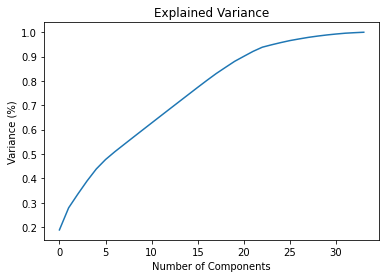

In [77]:
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') # for each component
plt.title('Explained Variance')
plt.show()

#### we can see that 95% of the variance is being explained by 25 components

In [78]:
pca=PCA(n_components=25)
new_data=pca.fit_transform(X_scaled)

principal_x=pd.DataFrame(new_data,columns=['PC-1','PC-2','PC-3','PC-4','PC-5','PC-6','PC-7','PC-8','PC-9','PC-10',
'PC-11','PC-12','PC-13','PC-14','PC-15','PC-16','PC-17','PC-18','PC-19','PC-20','PC-21','PC-22','PC-23','PC-24','PC-25'])

In [79]:
principal_x

,PC-1,PC-2,PC-3,PC-4,PC-5,PC-6,PC-7,PC-8,PC-9,PC-10,...,PC-16,PC-17,PC-18,PC-19,PC-20,PC-21,PC-22,PC-23,PC-24,PC-25
0,-0.887659,-1.056742,-3.173653,-3.224919,-0.538403,-0.385213,-0.031004,-0.059869,0.013549,-0.133397,...,-0.198554,0.352134,-0.376187,-0.463629,-0.265298,0.164202,0.733912,1.494013,-0.696756,0.047601
1,0.604864,3.969401,-0.071790,-0.379196,2.154180,-0.343284,1.026429,-0.236585,0.047670,-0.111282,...,-0.275383,0.337999,-1.888190,-0.251522,-0.523111,0.398693,-1.006397,-0.717285,-0.603703,-0.996872
2,-1.935436,0.469826,0.338764,0.195612,1.249533,-0.037058,0.133825,0.065566,0.102271,-0.062037,...,-0.340679,-0.154988,-0.430827,-0.476430,-0.054195,-0.157163,0.792258,-0.782760,-0.897746,-0.352220
3,-2.840630,-0.747582,0.851174,0.342580,0.473362,-0.171103,0.329474,-0.111059,-0.025768,-0.024131,...,-0.051590,-0.013780,-0.190795,0.171580,0.728335,0.178660,-0.826573,0.135688,0.074502,0.594639
4,2.203681,-0.268586,1.482104,-0.411054,-2.567731,0.104941,-0.510163,-0.197785,-0.000513,-0.009310,...,0.036117,0.176852,-0.315979,0.444641,0.867584,0.087851,-0.679169,-0.370313,-0.010690,-0.558226
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,-0.791084,1.986948,1.065938,-0.561298,-0.854194,0.017732,-0.439430,-0.055172,0.040110,-0.032279,...,-0.136492,0.049988,-0.155635,-0.496474,0.644441,0.156089,-0.395087,0.226291,0.014573,-0.436570
209589,-0.860577,-1.155188,0.919779,0.170300,-0.647630,-0.031642,-0.114929,0.067982,-0.005258,-0.048945,...,-0.128676,-0.201628,0.712496,-0.406131,0.075806,0.214500,-0.673039,-0.682967,0.272551,0.234621
209590,2.989228,-0.920022,-0.129999,0.173208,0.482004,0.389908,-0.996873,-0.026698,0.247180,-0.103896,...,-0.498903,0.129654,-1.901174,0.184999,-1.717275,0.398836,-0.435149,-0.671498,0.703442,-0.067100
209591,1.672851,-0.062656,-0.507896,-0.339871,0.332122,4.452201,0.997469,-0.025235,-0.026744,-0.232578,...,-0.481704,0.384682,-1.000693,-0.791544,-2.304516,-3.833724,-1.554531,0.535026,-0.855861,-0.087995


## Lets plot ROC AUC Curve to choose the best model

In [80]:
# Plot ROC/AUC for multiple models without hyperparams tuning

lr = LogisticRegression()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
kn = KNeighborsClassifier()
gbdt = GradientBoostingClassifier()
sgd= SGDClassifier()

In [81]:
# training with all classifier
lr.fit(x_train,y_train)
rf.fit(x_train,y_train)
dt.fit(x_train,y_train)
kn.fit(x_train,y_train)
gbdt.fit(x_train,y_train)
sgd.fit(x_train,y_train)

print('All models are trained')

All models are trained


In [82]:
# All models score captured
lr.fit(x_test,y_test)
rf.fit(x_test,y_test)
dt.fit(x_test,y_test)
kn.fit(x_test,y_test)
gbdt.fit(x_test,y_test)
sgd.fit(x_test,y_test)

print('All models test score captured')

All models test score captured


## Lets find ROC AUC score

In [83]:
# LogisticRegression
roc_auc_score(y_test,lr.predict(x_test))

0.5532353191697023

In [84]:
# DecisionTreeClassifier
roc_auc_score(y_test,dt.predict(x_test))

0.999989085352543

In [85]:
# RandomForestClassifier
roc_auc_score(y_test,rf.predict(x_test))

0.9999132013033701

In [86]:
# KNeighborsClassifier
roc_auc_score(y_test,kn.predict(x_test))

0.7524571109350588

In [87]:
# GradientBoostingClassifier
roc_auc_score(y_test,gbdt.predict(x_test))

0.7412682952864527

In [88]:
# SGDClassifier
roc_auc_score(y_test,sgd.predict(x_test))

0.5012307892514262

## Lets check ROC AUC curve for the fitted model

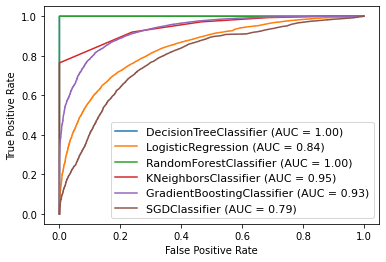

In [89]:
disp = plot_roc_curve(dt,x_test,y_test)
plot_roc_curve(lr,x_test,y_test,ax=disp.ax_)
plot_roc_curve(rf,x_test,y_test,ax=disp.ax_)
plot_roc_curve(kn,x_test,y_test,ax=disp.ax_)
plot_roc_curve(gbdt,x_test,y_test,ax=disp.ax_)
plot_roc_curve(sgd,x_test,y_test,ax=disp.ax_)
plt.legend(prop={'size':11}, loc='lower right')
plt.show()

In [100]:
accuracy=[88.30,88.67,92.12,88.95,89.07,91.85,87.66]
cross_val_score=[88.51,88.31,92.11,89.12,89.32,91.90,87.80]

model=['Logistic Regression','Decision Tree','Random Forest','KNN','SVM','Gradient','Stochastic']
best_model=pd.DataFrame({'Model':model,'Accuracy':accuracy,'Cross validation score':cross_val_score})
best_model

,Model,Accuracy,Cross validation score
0,Logistic Regression,88.30,88.51
1,Decision Tree,88.67,88.31
2,Random Forest,92.12,92.11
3,KNN,88.95,89.12
4,SVM,89.07,89.32
5,Gradient,91.85,91.90
6,Stochastic,87.66,87.80


In [101]:
# Choosing Random Forest as our best model because the difference between its accuracy and CV score is least among all models.

### Using GridSearchCV for hyper parameter tuning on best model (Random Forest)

In [102]:
# we are tuning three hyperparameters right now, we are passing different values for both parameters
grid_param = {
    'max_depth' : range(2,20,3),
    'min_samples_leaf' : range (1,20,2),
    'min_samples_split' : range (2,20,2)
}

In [103]:
grid_search = GridSearchCV(estimator=rand_clf,
                          param_grid=grid_param,
                          cv=5,
                          n_jobs =-1)

In [104]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=101),
             n_jobs=-1,
             param_grid={'max_depth': range(2, 20, 3),
                         'min_samples_leaf': range(1, 20, 2),
                         'min_samples_split': range(2, 20, 2)})

In [105]:
best_parameters = grid_search.best_params_
print(best_parameters)

{'max_depth': 17, 'min_samples_leaf': 1, 'min_samples_split': 12}


In [106]:
rand_clf = RandomForestClassifier(max_depth =17, min_samples_leaf=1, min_samples_split=12)
rand_clf.fit(x_train,y_train)

RandomForestClassifier(max_depth=17, min_samples_split=12)

In [107]:
rand_clf.score(x_test,y_test)

0.9210290272715128

In [108]:
# Getting approx same accuracy after doing hyper parameter tuning.

### Model Saving

In [109]:
# saving the model to local system
filename = 'Micro Credit Defaulter Project_model.pickle'
pickle.dump(rand_clf,open(filename,'wb'))

In [110]:
# Model has been saved successfully. Let's check by predicting with the loaded model.

### Loading and predicting with the loaded model

In [111]:
# loading the saved model
loaded_model = pickle.load(open(filename,'rb'))

In [112]:
# predicting with the loaded model
predictions = loaded_model.predict(x_test)